run avec le kernel py310_data_analysis2

données disponibles à l'adresse suivante : 

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Variables utilisées pour cette exercice : 

    gender : 2 entrée, string
    race/ethnicity : 5 entrée, string
    parental level of education : 5 entrée, string
    lunch, 2 entrée, string
    test preparation course : 2 entrée, string
    math score : sur une échelle de 1 à 100
    reading score : sur une échelle de 1 à 100
    writing score : sur une échelle de 1 à 100
    
effectif : 1000 individus


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats.contingency import association

In [3]:
#définir l'accès, lecture du fichier
path = 'data/StudentsPerformance.csv'
obs = pd.read_csv(path)

obs = pd.read_csv(path)
obs.set_index('gender', inplace=True)
obs.head(15)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78
female,group B,some college,standard,completed,88,95,92
male,group B,some college,free/reduced,none,40,43,39
male,group D,high school,free/reduced,completed,64,64,67


In [4]:
#nb lignes et colonnes dans le tableau 
obs.shape

(1000, 7)

inspection des données : résultats aux épreuves

In [6]:
#variable des résultats des diverses branches. 
prep = obs ['test preparation course']
maths = obs['math score']
reading = obs ['reading score']
writing = obs ['writing score']

type(maths), maths.head()

(pandas.core.series.Series,
 gender
 female    72
 female    69
 female    90
 male      47
 male      76
 Name: math score, dtype: int64)

<Axes: >

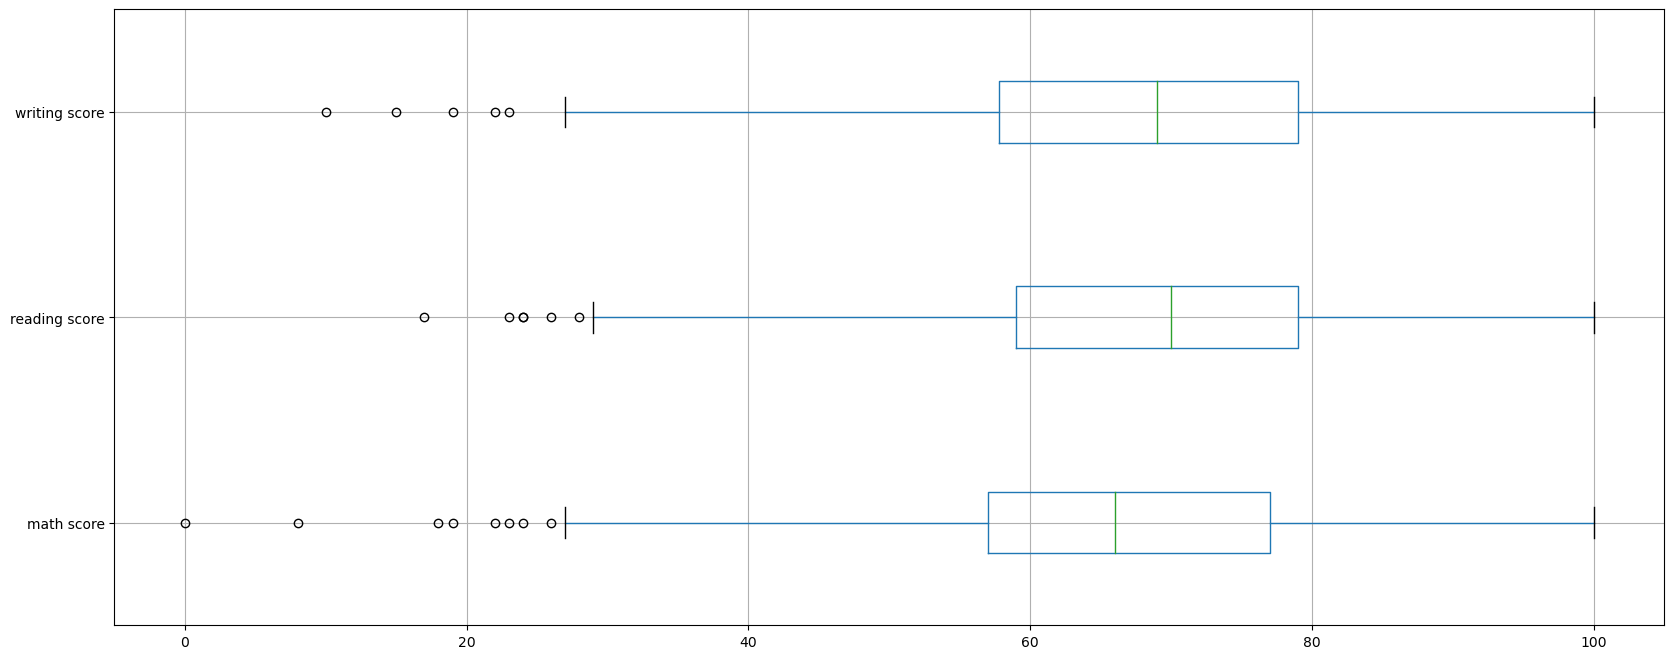

In [7]:
### représentation de données : les résultats de différentes branches dans des boites à moustache.
# ainsi on repérera la moyenne et les outliers. 

obs.boxplot(column=['math score', 'reading score', 'writing score'], vert=False, figsize=(20,8))

première analyse : les scores sont relativement similaires. La majorité des résultats se trouvent entre 60 et 80 points. Le score de math est le plus bas relativement aux autres branches. Les pires scores se trouvent en math.

étude quantitative des résultats de la cohorte en math. 

In [8]:
#  tri par leur score en math, descendant
s_maths = maths.sort_values() 
s_maths.head()

gender
female     0
female     8
female    18
female    19
female    22
Name: math score, dtype: int64

In [9]:
# Regrouper par score de math et compter les individus par valeur
cs_maths = s_maths.groupby(s_maths).count()
print(type(cs_maths))
cs_maths.head()

<class 'pandas.core.series.Series'>


math score
0     1
8     1
18    1
19    1
22    1
Name: math score, dtype: int64

In [10]:
# Transformer la serie en dataFrame
df_cs_maths = pd.DataFrame(cs_maths)
print(type(df_cs_maths))
df_cs_maths.head()

<class 'pandas.core.frame.DataFrame'>


,math score
math score,
0,1
8,1
18,1
19,1
22,1


In [11]:
 # copie indépendante de la dataframe
 # distribution des scores de math en groupe de 1-10. 
score = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
c_obs = obs.copy(deep=True)
c_obs['score'] = pd.cut(c_obs['math score'], score, right=False)
c_obs['score'] = c_obs['score'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head(10)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
gender,,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74,70-79
female,group C,some college,standard,completed,69,90,88,60-69
female,group B,master's degree,standard,none,90,95,93,90-100
male,group A,associate's degree,free/reduced,none,47,57,44,40-49
male,group C,some college,standard,none,76,78,75,70-79
female,group B,associate's degree,standard,none,71,83,78,70-79
female,group B,some college,standard,completed,88,95,92,80-89
male,group B,some college,free/reduced,none,40,43,39,40-49
male,group D,high school,free/reduced,completed,64,64,67,60-69


In [12]:
# en format groupby
gb_score = pd.DataFrame(c_obs.groupby('score').size())
gb_score.columns = ['score']
gb_score

,score
score,
0-9,2
10-19,2
20-29,10
30-39,26
40-49,95
50-59,188
60-69,268
70-79,216
80-89,135


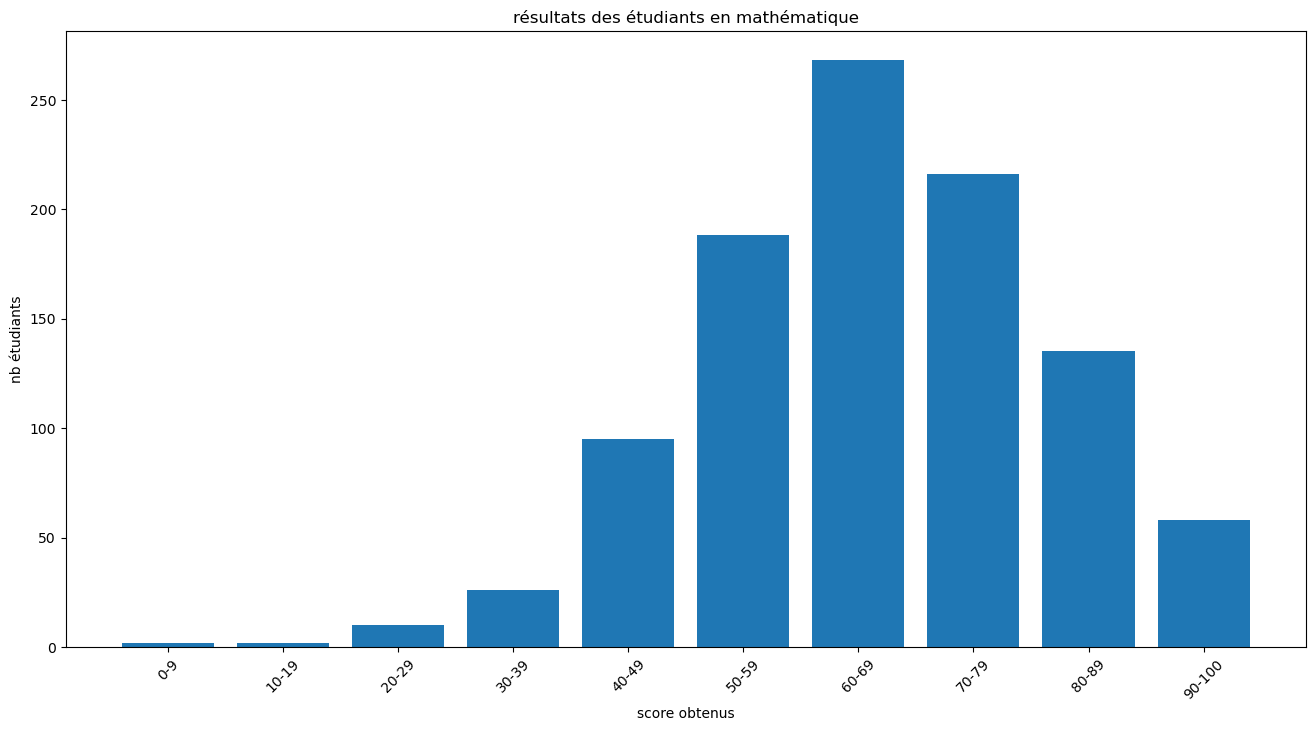

In [13]:
# Diagramme à barre

objects = [l for l in gb_score.index]
eff = [l for l in gb_score['score']]

p1 = plt.bar(objects, eff)

plt.ylabel('nb étudiants')
plt.xlabel ('score obtenus')
plt.title("résultats des étudiants en mathématique")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

In [14]:
# résultat cumulé en math

gb_score['mathScore_cumule'] = gb_score['score'].cumsum()
gb_score

,score,mathScore_cumule
score,,
0-9,2,2
10-19,2,4
20-29,10,14
30-39,26,40
40-49,95,135
50-59,188,323
60-69,268,591
70-79,216,807
80-89,135,942


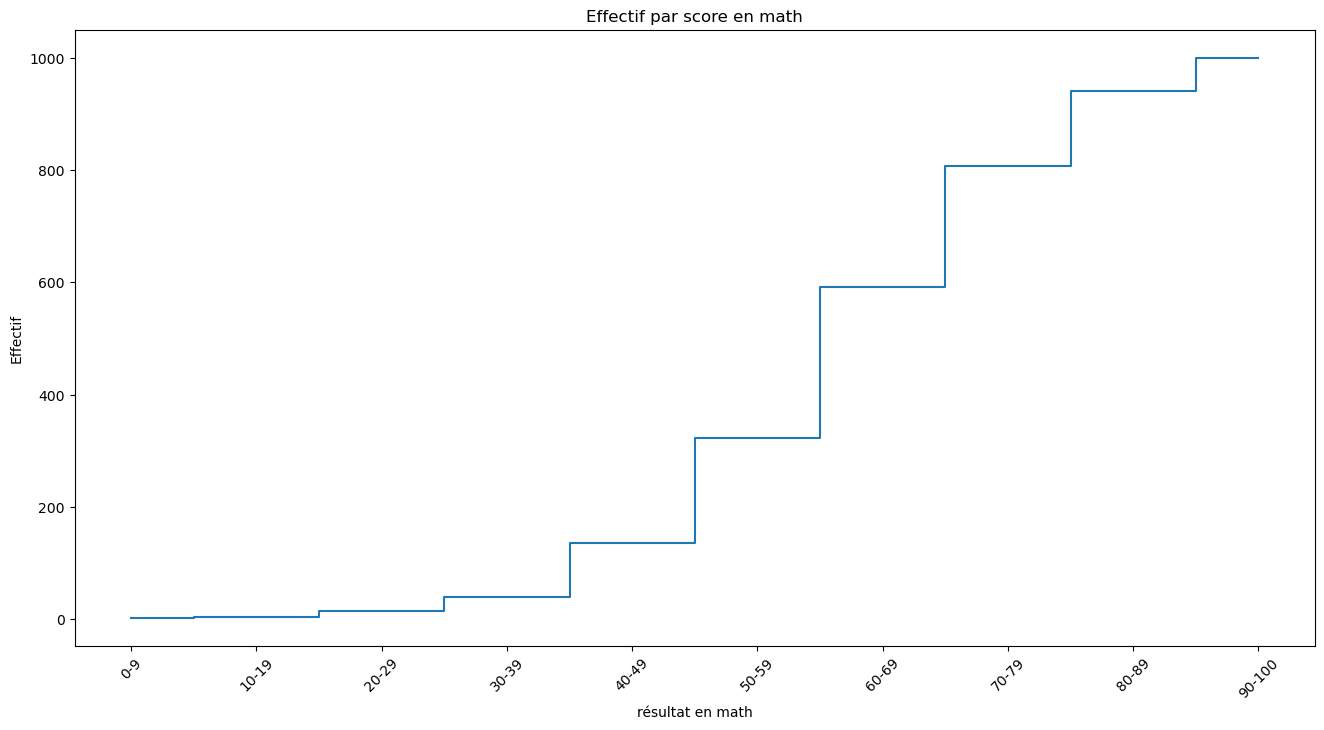

In [15]:
# diagramme, résultat en math, cumulatif

objects = gb_score.index
#eff = df_cs_age['effectif_cumule']
eff = gb_score['mathScore_cumule']

p1 = plt.plot(objects, eff, drawstyle='steps-mid')

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('résultat en math')
plt.title('Effectif par score en math')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [16]:
### même démarche, mais avec le niveau d'éducation des parents --> étude qualitative
# dataframe d'effectif, par niveau d'éducation des parents

gb_parent = obs.groupby('parental level of education').size()
sgb_parent = gb_parent.sort_values(ascending = True)

df_parent = pd.DataFrame(sgb_parent, columns=['effectif'])
df_parent.reset_index(inplace=True)
df_parent

,parental level of education,effectif
0,master's degree,59
1,bachelor's degree,118
2,some high school,179
3,high school,196
4,associate's degree,222
5,some college,226


In [17]:
# definition d'un code pour chaque niveau d'education

df_parent['code_education'] = [6,5,2,1,3,4]
df_parent

,parental level of education,effectif,code_education
0,master's degree,59,6
1,bachelor's degree,118,5
2,some high school,179,2
3,high school,196,1
4,associate's degree,222,3
5,some college,226,4


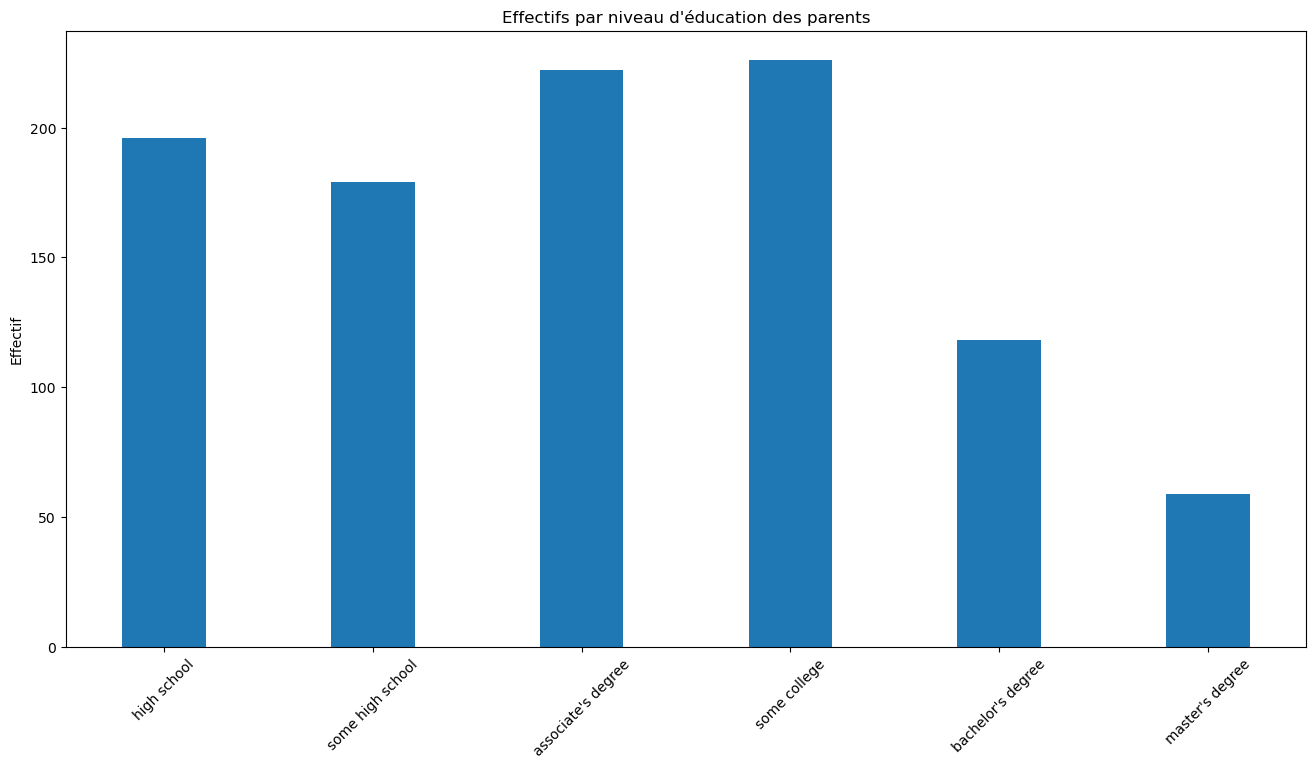

In [18]:
# Distribution par niveau d'éducation des parents : représentation en diagramme à barres

objects = [l for l in df_parent['parental level of education']]
eff = [l for l in df_parent['effectif']]

objects = [l for l in df_parent.sort_values('code_education')['parental level of education']]
eff = [l for l in df_parent.sort_values('code_education')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title("Effectifs par niveau d'éducation des parents")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

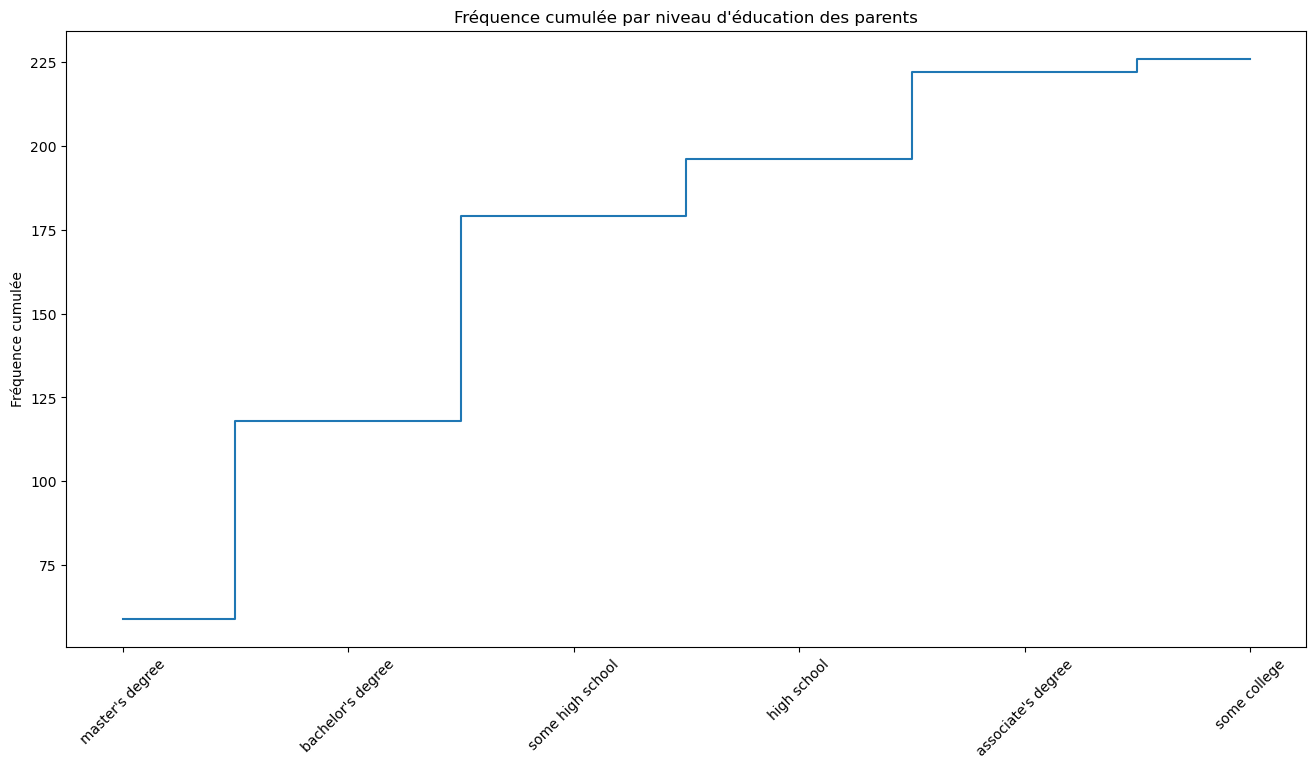

In [19]:
# résultat cumulatif pour le niveau d'éducation des parents

objects = [l for l in df_parent.index]
eff = [l for l in df_parent.values]

objects = [l for l in df_parent['parental level of education']]
eff = [l for l in df_parent['effectif']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid')

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title("Fréquence cumulée par niveau d'éducation des parents")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
plt.show()

Analyse bivariée 

In [20]:
# visualisation en boxplot des résultats en math, séparé entre les effectifs qui ont participé au test de préparation et les autres.


obs.boxplot(column=['math score'], by=['test preparation course'], vert=False, figsize=(20,4))

<Axes: title={'center': 'math score'}, ylabel='[test preparation course]'>

In [21]:
### deux variables qualitatives : niveau d'éducation des parents et groupe ethnique

#tableau de contingence education des parents et gorupe ethnique

X = "parental level of education"  # "0"
Y = "race/ethnicity"

c_obs_parent_ethnie = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parent_ethnie

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Total
race/ethnicity,,,,,,,
group A,14,12,18,3,18,24,89
group B,41,20,48,6,37,38,190
group C,78,40,64,19,69,49,319
group D,50,28,44,23,67,50,262
group E,39,18,22,8,35,18,140
Total,222,118,196,59,226,179,1000


In [22]:
#fréquence 

c_obs_parent_ethnie_frequence = np.round(c_obs_parent_ethnie*100/c_obs_parent_ethnie.iloc[-1,-1],1)
c_obs_parent_ethnie_frequence

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Total
race/ethnicity,,,,,,,
group A,1.4,1.2,1.8,0.3,1.8,2.4,8.9
group B,4.1,2.0,4.8,0.6,3.7,3.8,19.0
group C,7.8,4.0,6.4,1.9,6.9,4.9,31.9
group D,5.0,2.8,4.4,2.3,6.7,5.0,26.2
group E,3.9,1.8,2.2,0.8,3.5,1.8,14.0
Total,22.2,11.8,19.6,5.9,22.6,17.9,100.0


In [32]:
## Effectifs des niveaux d'éducations des parents par ethnie
# j'aimerais pouvoir trier ces niveaux d'éducation de façon à obtenir une idée plus clair des bac+x.
# pouvoir placer Bachelor et Master l'un à coté de l'autre donnerait une meilleure appréciation de ces colonnes.
# ainsi, avoir un extrême "haute éducation" d'un coté et "basse éducation" de l'autre serait plus pertinent. 
g = c_obs_parent_ethnie.iloc[:-1, :-1].sort_index(ascending=False)\
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = "niveau d'education des parents par groupe ethnique")

In [33]:
# pourcentages des lignes
stacked_data_lignes = c_obs_parent_ethnie.apply(lambda x: (x*100/sum(x)*2).round(2), axis=1) # axis=0
stacked_data_lignes

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,Total
race/ethnicity,,,,,,,
group A,15.73,13.48,20.22,3.37,20.22,26.97,100.0
group B,21.58,10.53,25.26,3.16,19.47,20.00,100.0
group C,24.45,12.54,20.06,5.96,21.63,15.36,100.0
group D,19.08,10.69,16.79,8.78,25.57,19.08,100.0
group E,27.86,12.86,15.71,5.71,25.00,12.86,100.0
Total,22.20,11.80,19.60,5.90,22.60,17.90,100.0


In [31]:
#visualisation des pourcentages
z = stacked_data_lignes.iloc[:-1, :-1].sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(16,10), title="proportion des niveaux d'éducation des parents par grouep ethnique")

for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [30]:
x = np.array(c_obs['writing score'])
y = np.array(c_obs['reading score'])



plt.rcParams["figure.figsize"] = [10,10]

plt.plot(x, y, 'o')
plt.ylabel('compréhension écrite')
plt.xlabel ('rédaction')
plt.title("Comparaison entre résultat en rédaction et en compréhension écrite")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

print('Coeff. de Pearsons: {}'.format(np.corrcoef([x,y])[1][0].round(4)))
plt.draw()

Coeff. de Pearsons: 0.9546


In [27]:
np.corrcoef([x,y])[1][0].round(4)

0.9546